Test Score on Mihai's Board: 19939

Training RMSE on Cross-validated Lasso Model: 20824.18 

Validation RMSE on Cross-validated Lasso Model: 18866.54

Necessary Packages For Analysis

In [47]:
#  Import All Needed Packages

import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from ISLP.models import ModelSpec as MS
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Data Pre-Processing

Importation of Merged Train & Test Housing Data

In [48]:
# I merged the housing datasets into one in Excel for easy loading and cleaning
Housing_data = pd.read_excel(r"C:\Users\ekf98\OneDrive\Documents\UofG Courses\Term 1 Fall 2024\Intro to Data Science\Assignments\Project One\Project1_data_files\Project1_data_files\Housing_Data.xlsx")

Housing_data = pd.DataFrame(Housing_data) # Creating dataframe of the housing data

# Setting all rows and columns to max display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [49]:
# Function to obtain percentages of missing values 
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')

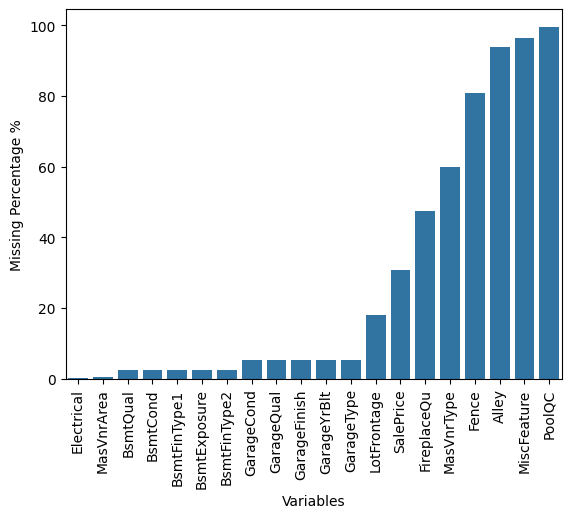

In [50]:
# Displaying Percentages of Missing Values  
show_percent_missing(Housing_data)

We can see from the plot above that several features from "Fence" to 'PoolQC' have missing values equal to or greater than 80%. These variables will be drop and the rest of the predictors with missing values would be handled case by case.

In [51]:
Housing_data.drop(columns=['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1, inplace=True)

Dealing With Multicollinearity Partially

In [52]:
# I also drop these additional columns as other columns are derived from these. 
# That is, "BsmtFinSF1"+"BsmtFinSF2"+"BsmtUnfSF" = TotalBsmtSF and "1stFlrSF"+"2ndFlrSF"+"LowQualFinSF" = GrLivArea
Housing_data.drop(columns=["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "1stFlrSF",	"2ndFlrSF",	"LowQualFinSF"], axis=1, inplace=True)
Housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,799,60,RL,104.0,13518,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,Unf,1926,GasA,Ex,Y,SBrkr,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,0,7,2009,New,Partial,485000.0
1,186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,Unf,1107,GasA,Ex,Y,SBrkr,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,0,6,2006,WD,Normal,475000.0
2,1374,20,RL,NaN,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,2633,GasA,Ex,Y,SBrkr,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,0,3,2007,WD,Normal,466500.0
3,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,Unf,2076,GasA,Ex,Y,SBrkr,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000.0
4,474,20,RL,110.0,14977,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,304.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,1976,GasA,Ex,Y,SBrkr,1976,1,0,2,0,2,1,Gd,7,Typ,1,Ex,Attchd,2006.0,RFn,3,908,TA,TA,Y,250,63,0,0,0,0,0,7,2007,New,Partial,440000.0


There would be other variables that are highly correlated with each other but I leave this to the Lasso model to take some of these variables out.

In [53]:
# Grouping All Columns to Appropriate Datatypes

cols_to_char = ['MSSubClass', "MSZoning", "LotShape",	"Street", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
                "Condition2", "BldgType", "HouseStyle", "RoofStyle",	"RoofMatl",	"Exterior1st",	"Exterior2nd",	"MasVnrType", "ExterQual", "ExterCond",	
                "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",	
                "KitchenQual", "Functional", "FireplaceQu", "GarageType",	"GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition", "OverallQual", "OverallCond"]


cols_to_numeric = ["LotFrontage", "LotArea",  "MasVnrArea",  "TotalBsmtSF", "GarageYrBlt", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "Fireplaces",
                    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", 
                    "MiscVal", "SalePrice", "BedroomAbvGr",	"KitchenAbvGr", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

Cleaning The Dataset

In [54]:
# Checking For Missing Values in columns to be set to numeric

numeric_columns_missing_check = Housing_data[cols_to_numeric].isnull().sum()

numeric_columns_missing = numeric_columns_missing_check[Housing_data[cols_to_numeric].isnull().sum() > 0]

numeric_columns_missing

LotFrontage    259
MasVnrArea       8
GarageYrBlt     78
SalePrice      446
dtype: int64

In [55]:
# Filling Missing Values With Appropriate Treatments

# I fill Masonry Veneer Area with zeros for missing values as those houses have no masonry veneer type. 
# They were probably built using other exterior finishes like vinyl or fiber cement siding
Housing_data['MasVnrArea'] = Housing_data['MasVnrArea'].fillna(0).astype(int)

# Filling null SalePrices with zeros. The null values are from the test dataset I merged with the training dataset
Housing_data['SalePrice'] = Housing_data['SalePrice'].fillna(0).astype(int)

# Filling null GarageYrBlt with 1900 to indicate houses with no garages
Housing_data['GarageYrBlt'] = Housing_data['GarageYrBlt'].fillna(1900).astype(int)

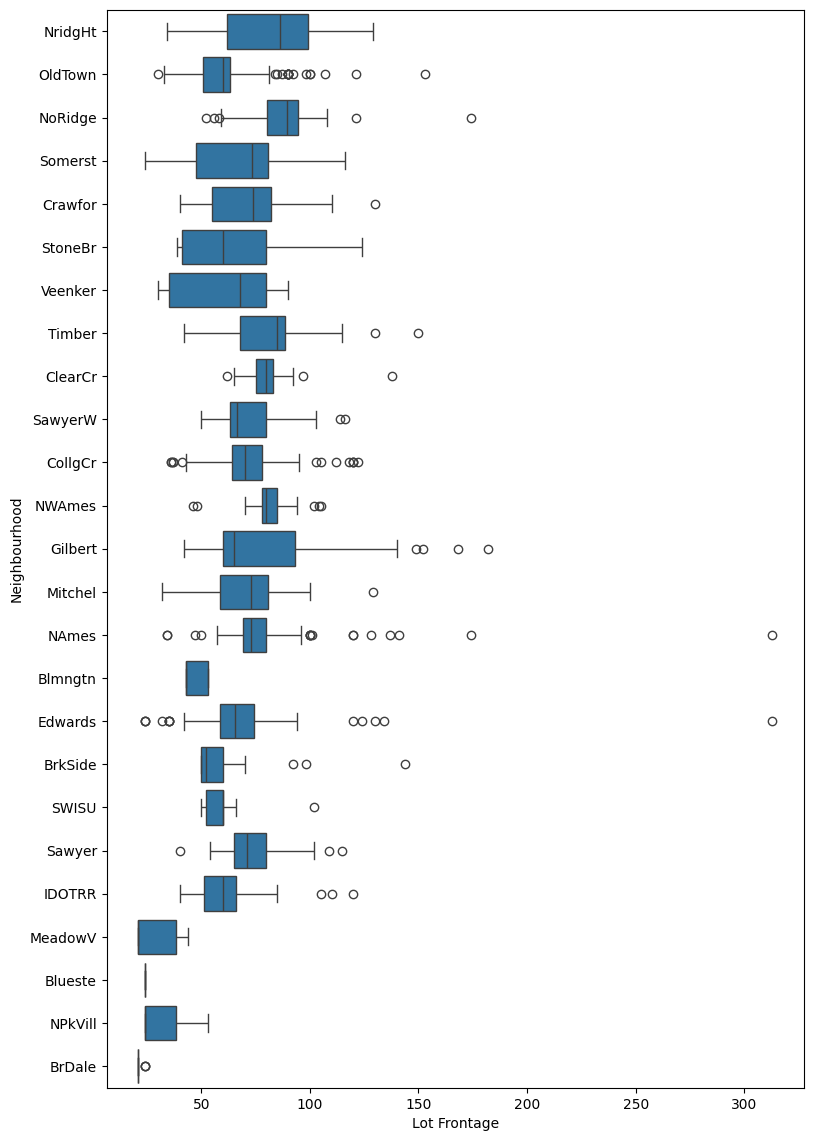

In [56]:
# Assuming Lot Frontage is associated with the neighbourhood a house is in 

plt.figure(figsize=(9, 14))
sns.boxplot(x='LotFrontage', y='Neighborhood', data=Housing_data, orient='h')
plt.xlabel('Lot Frontage')
plt.ylabel('Neighbourhood');

There is variability in the neighbourhoods' median Lot Frontages and interquartile Lot Frontage values. Thus, it would be a good strategy to fill missing values for Lot Frontage with the median based on the median Lot Frontage of each neighbourhood.

In [57]:
# Displaying the median Lot Frontages' of each neighbourhood.
Housing_data.groupby('Neighborhood')['LotFrontage'].median().sort_values()

Neighborhood
BrDale     21.0
MeadowV    21.0
Blueste    24.0
NPkVill    24.0
Blmngtn    43.0
BrkSide    52.0
StoneBr    60.0
SWISU      60.0
IDOTRR     60.0
OldTown    60.0
Gilbert    65.0
Edwards    65.5
SawyerW    66.5
Veenker    68.0
CollgCr    70.0
Sawyer     71.0
Mitchel    73.0
NAmes      73.0
Somerst    73.5
Crawfor    74.0
NWAmes     80.0
ClearCr    80.0
Timber     85.0
NridgHt    86.0
NoRidge    89.5
Name: LotFrontage, dtype: float64

In [58]:
# Filling missing values with median of each neighbourhood and checking for any remaining missing values
Housing_data['LotFrontage'] = Housing_data.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.median()))
Housing_data['LotFrontage'].isnull().sum()

0

In [59]:
# Checking For Missing Values in columns to be set to char
missing_cat_columns = Housing_data[cols_to_char].columns[Housing_data[cols_to_char].isnull().any()]
missing_cat_columns

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

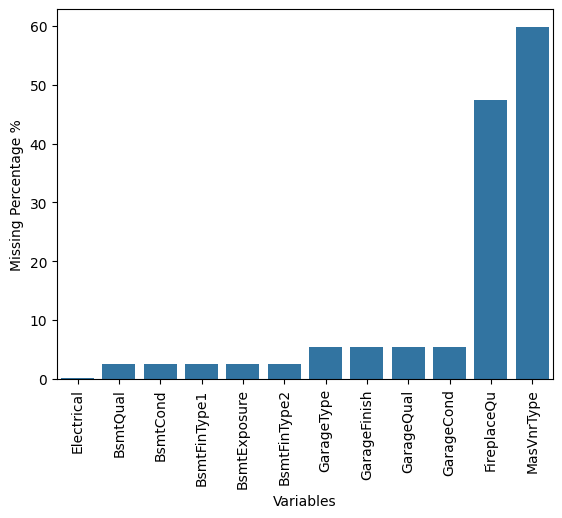

In [60]:
# Displaying Percentages of Missing Values  
show_percent_missing(Housing_data)

In [61]:
# All these variables have moderate missing values(ranging from 3% to 60%) as shown in the plot above.
# These variables are missing due to the particular item/structure not part of the house or being incompleted and are filled in the dataset accordingly.
# Thus, data on these could not be captured at the point of sale.
Housing_data['MasVnrType'] = Housing_data['MasVnrType'].fillna('No Venner Type')
Housing_data['BsmtQual'] = Housing_data['BsmtQual'].fillna('No Basement')
Housing_data['BsmtCond'] = Housing_data['BsmtCond'].fillna('No Basement')
Housing_data['BsmtExposure'] = Housing_data['BsmtExposure'].fillna('No Basement')
Housing_data['BsmtFinType1'] = Housing_data['BsmtFinType1'].fillna('No Basement')
Housing_data['BsmtFinType2'] = Housing_data['BsmtFinType2'].fillna('No Basement')
Housing_data['FireplaceQu'] = Housing_data['FireplaceQu'].fillna('No Fireplace')
Housing_data['GarageType'] = Housing_data['GarageType'].fillna('No Garage')
Housing_data['GarageFinish'] = Housing_data['GarageFinish'].fillna('No Garage')
Housing_data['GarageQual'] = Housing_data['GarageQual'].fillna('No Garage')
Housing_data['GarageCond'] = Housing_data['GarageCond'].fillna('No Garage')

Creating Additional Columns

In [62]:
Housing_data['AgeAtSale'] = Housing_data['YrSold'] - Housing_data['YearBuilt']
cols_to_numeric.append('AgeAtSale')

The AgeAtSale column is created as the age of the house influences buyers demand and then prices. Newer homes initially have higher prices up to a point as they contain modern infrastructure but would go down in prices as they age after certain years, holding other factors constant.

Converting Columns To Strings & Integer

In [63]:
Housing_data[cols_to_char] = Housing_data[cols_to_char].astype(str)

Housing_data[cols_to_numeric] = Housing_data[cols_to_numeric].astype(int)

Obtaining Dummies Here For Categorical Variables

In [64]:
Housing_data_dummies = pd.get_dummies(Housing_data, drop_first=True)
Housing_data_dummies.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeAtSale,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Venner Type,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,Ga

In [65]:
cols_to_numeric.remove("SalePrice")
print(cols_to_numeric)

['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GarageYrBlt', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'AgeAtSale']


After cleaning and obtaining my dummies, I create a condition below to split the data into the original test and training datasets given by Mihai. 

In [66]:
condition = (Housing_data_dummies['SalePrice'].isnull()) | (Housing_data_dummies['SalePrice'] == 0)

# Creating training and datasets based on the conditions

train_data = Housing_data_dummies[~condition]


test_data = Housing_data_dummies[condition]
test_data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeAtSale,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Venner Type,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,Ga

Handling Outliers

Looking at the scatterplots, we can see some of the plots have outliers. For instance, LotFrontages of square feet above 300 sold for less than $300,000, which are extreme relative to the rest of the LotFrontage values. Hence, those points would be considered abnormal and taken out. A similar approach is taken for other variables. I highlight the abnormal values below this plot and proceed to take them out.

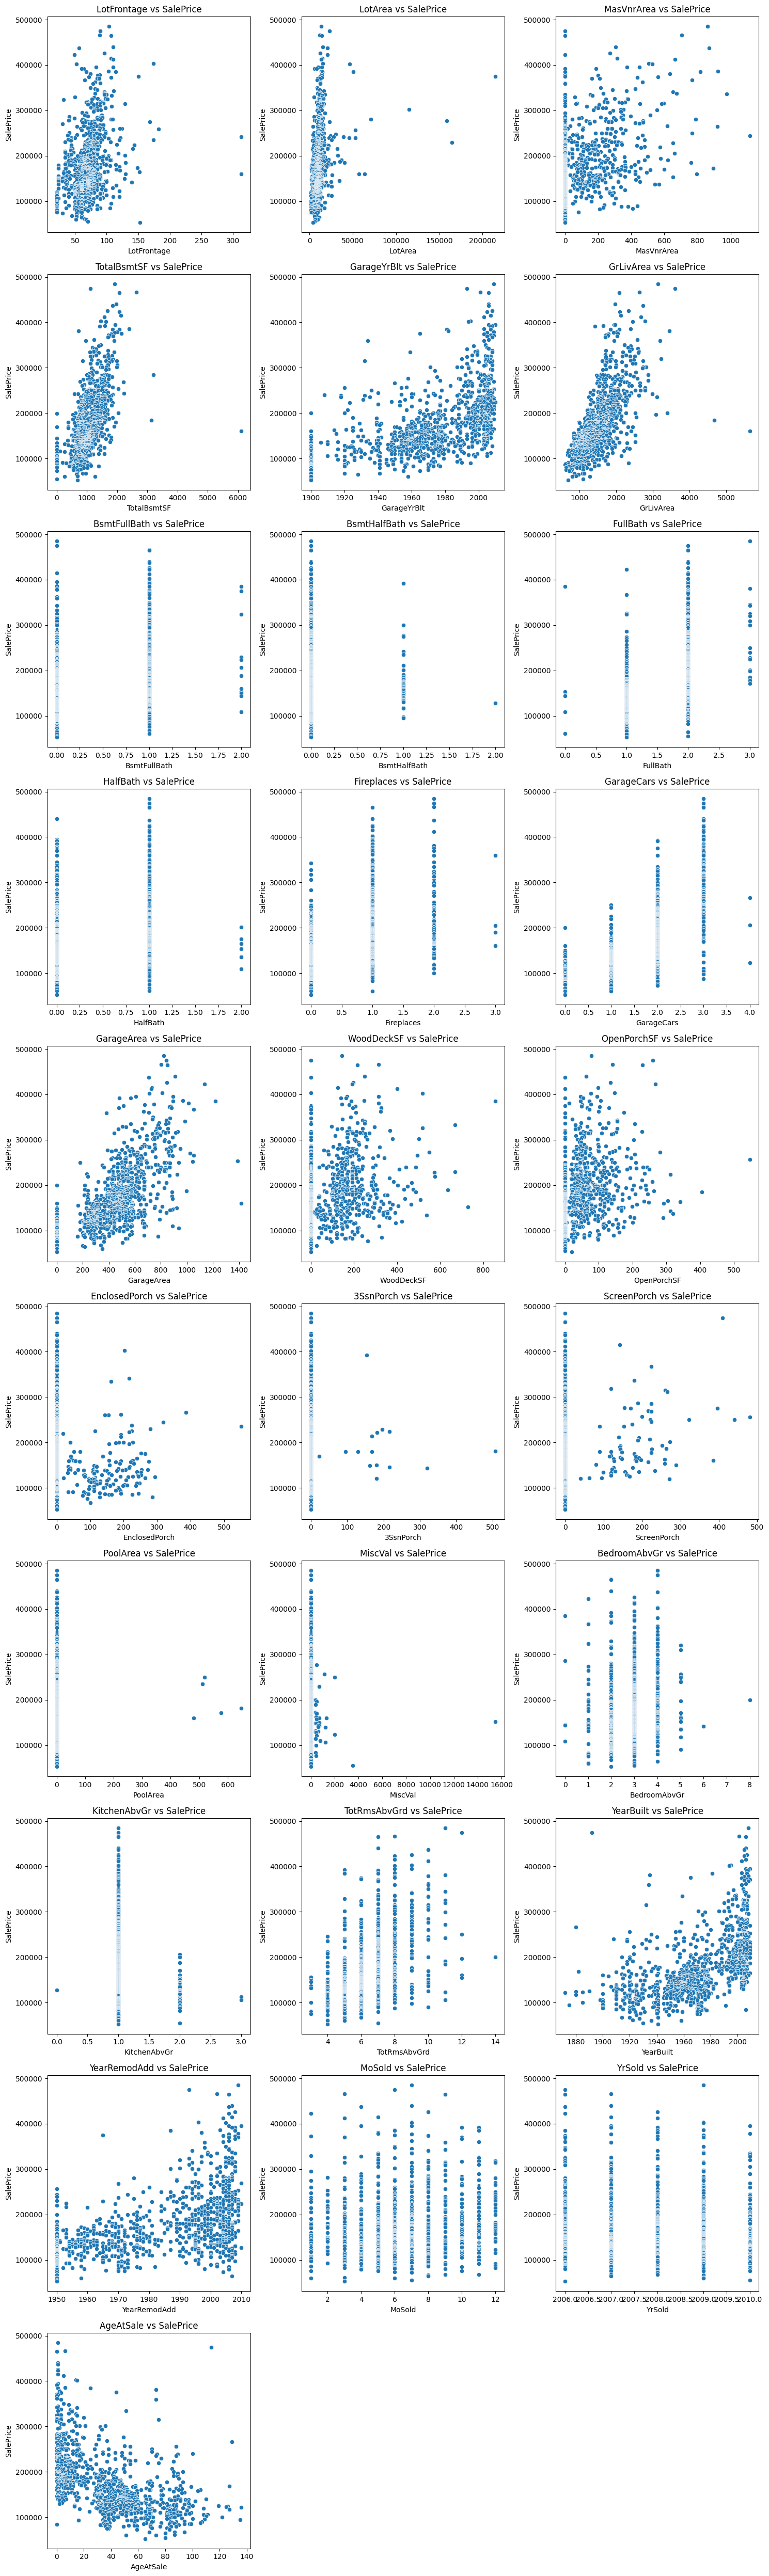

In [67]:
# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(cols_to_numeric) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(cols_to_numeric) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'SalePrice'
for i, col in enumerate(cols_to_numeric):
    sns.scatterplot(x=train_data[col], y =train_data['SalePrice'], ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(cols_to_numeric), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

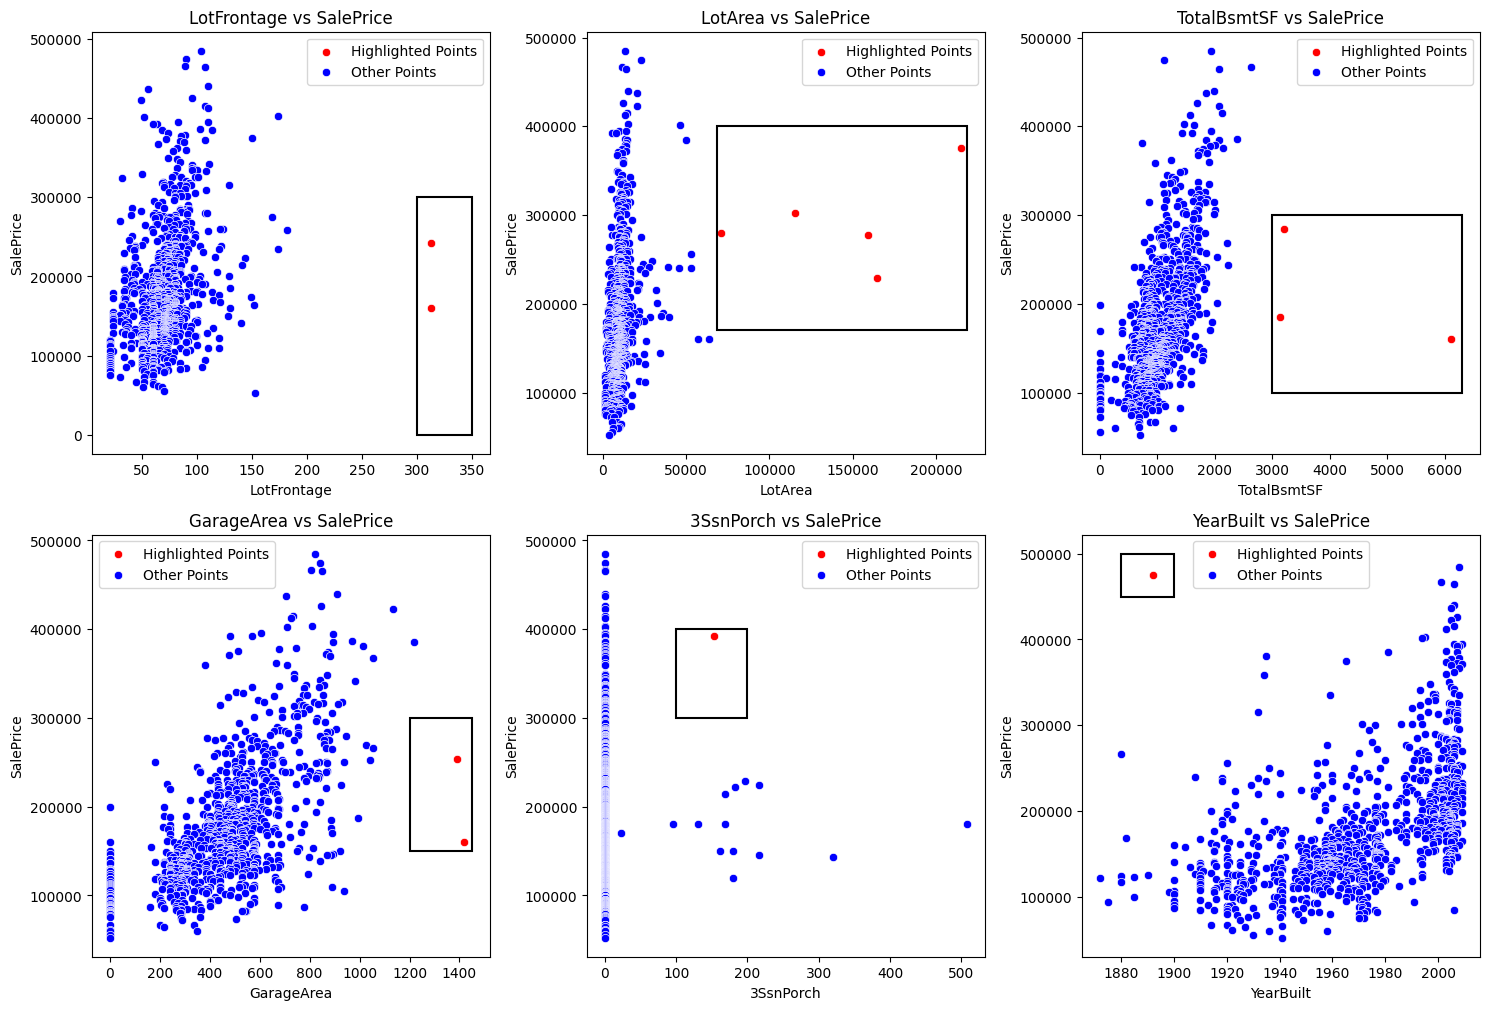

In [68]:
# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(cols_to_numeric) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(cols_to_numeric) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# Setting this to track plots created
used_plots = []

# plotting each numeric column against 'SalePrice'
for col in cols_to_numeric:
    if col == 'LotFrontage':
        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<300000) & (train_data['LotFrontage']>300)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((300, 0), 50, 300000, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])


    elif col == 'LotArea':
        
        # Setting boundaries for the box
        y_min = 170000
        y_max = 400000

        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<y_max) & (train_data['SalePrice'] > y_min) & (train_data['LotArea']>70000)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((68500, y_min), 150000, y_max - y_min, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])

    elif col == 'TotalBsmtSF':
        
        # Setting boundaries for the box
        y_min = 100000
        y_max = 300000


        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<y_max) & (train_data['SalePrice'] > y_min) & (train_data['TotalBsmtSF']>3000)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((3000, y_min), 3300, y_max - y_min, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])


    elif col == 'GarageArea':
        
        # Setting boundaries for the box
        y_min = 150000
        y_max = 300000


        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<y_max) & (train_data['SalePrice'] > y_min) & (train_data['GarageArea']>1200)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((1200, y_min), 250, y_max - y_min, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])


    elif col == '3SsnPorch':
        
        # Setting boundaries for the box
        y_min = 300000
        y_max = 400000


        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<y_max) & (train_data['SalePrice'] > y_min) & (train_data['3SsnPorch']>100)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((100, y_min), 100, y_max - y_min, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])
    
    elif col == 'YearBuilt':
        
        # Setting boundaries for the box
        y_min = 450000
        y_max = 500000
        

        # Creating mask for points to highlight
        mask = (train_data['SalePrice']<y_max)  & (train_data['SalePrice'] > y_min) & (train_data['YearBuilt']<1920)

        # Plotting highlighted Points
        sns.scatterplot(x=train_data[mask][col], y =train_data[mask]['SalePrice'], color='red', label='Highlighted Points', ax=axes[len(used_plots)])

        # Plotting non-highlighted Points
        sns.scatterplot(x=train_data[~mask][col], y =train_data[~mask]['SalePrice'], color='blue', label='Other Points', ax=axes[len(used_plots)])
        
        # Defining and Adding Rectangle Around Selected Points
        rect = patches.Rectangle((1880, y_min), 20, y_max - y_min, linewidth=1.5, edgecolor='black', facecolor='none')
        axes[len(used_plots)].add_patch(rect)
        axes[len(used_plots)].set_title(f'{col} vs SalePrice')
        used_plots.append(axes[len(used_plots)])
        

    else:
        pass

# Hiding any unused axes by turning off their visibility
for ax in axes:
    if ax not in used_plots:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

I highlighted these abnormal sale prices given the variable in question and proceeded to take them out. This approach is taken with caution as removing abnormal Sale prices given certain lot frontage areas leads to deleting rows that impact other variables. Hence, I do not chase every seemingly 'abnormal' Sale price given the variable just the few that really stand out and make sense given the data description of the variables.

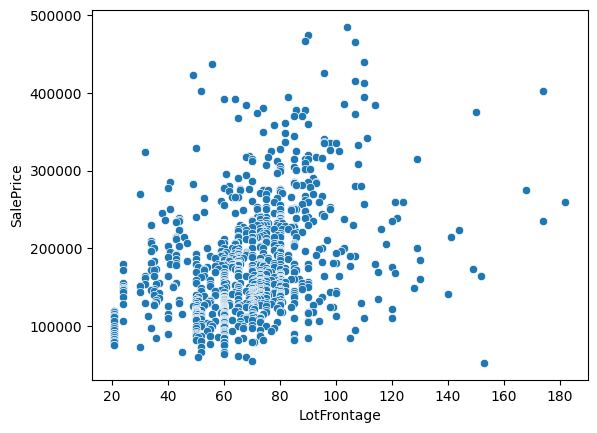

In [69]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']<300000) & (train_data['LotFrontage']>300)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train_data);

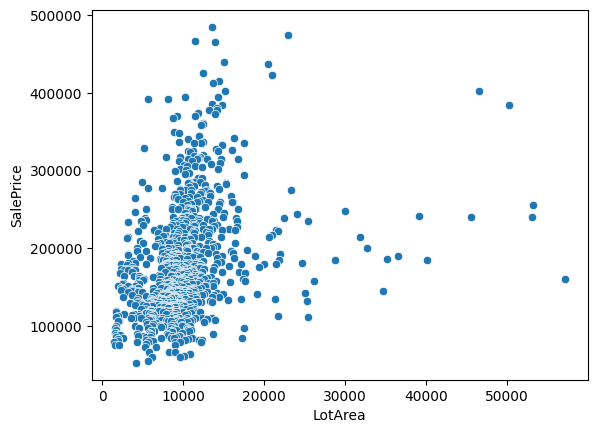

In [71]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']<400000) & (train_data['LotArea']>70000)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='LotArea', y='SalePrice', data=train_data);

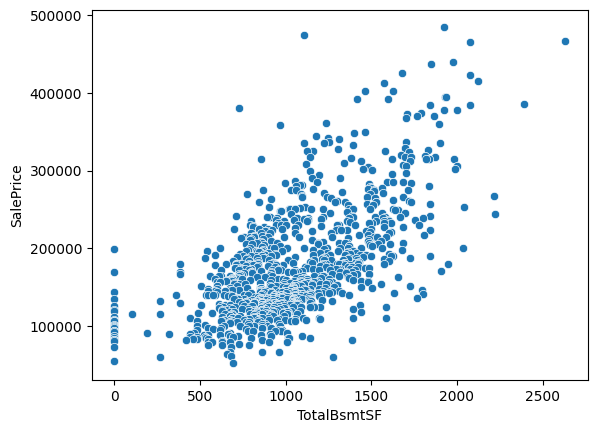

In [72]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']<300000) & (train_data['TotalBsmtSF']>3000)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_data);

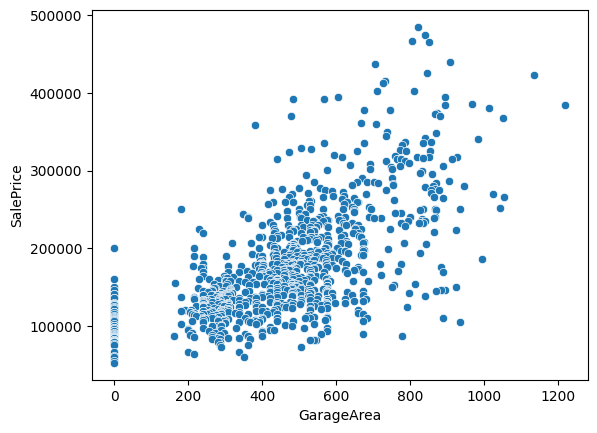

In [73]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']<300000) & (train_data['GarageArea']>1200)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_data);

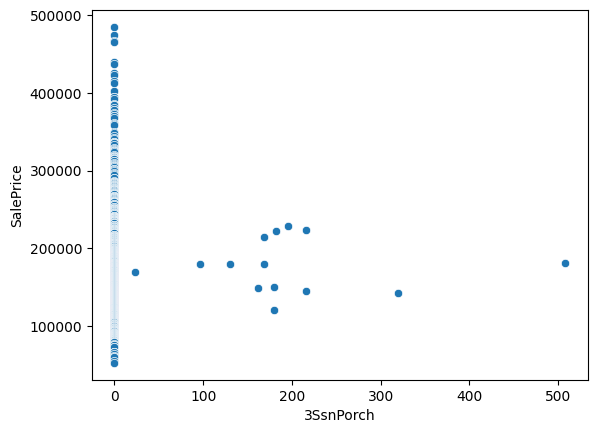

In [74]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']>300000) & (train_data['3SsnPorch']>100)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=train_data);

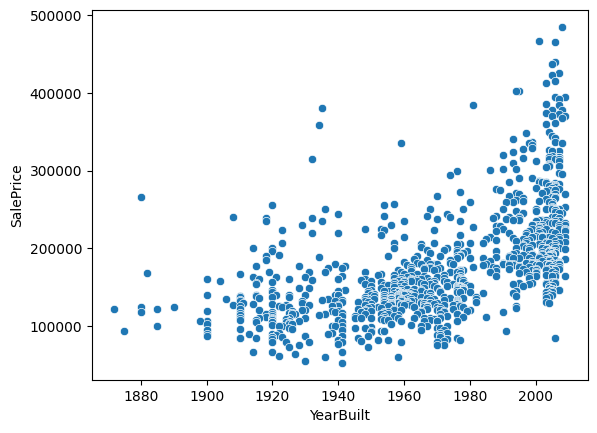

In [75]:
# Indexing abnormal points to remove
index_to_drop = train_data[(train_data['SalePrice']>400000) & (train_data['YearBuilt']<1920)].index

# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

# Plotting out the cleaned variable
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data);

Standardizing Numeric Columns Excluding The SalePrice in both Training and Test Datasets

In [77]:
# Standardizing Numeric Variables Before Making Estimations in Test Data
test_data[cols_to_numeric]= (test_data[cols_to_numeric] - test_data[cols_to_numeric].mean()) / test_data[cols_to_numeric].std()

test_data.head()

C:\Users\ekf98\AppData\Local\Temp\ipykernel_19016\3102436513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[cols_to_numeric]= (test_data[cols_to_numeric] - test_data[cols_to_numeric].mean()) / test_data[cols_to_numeric].std()


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeAtSale,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Venner Type,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,Ga

In [78]:
# Standardizing Numeric Variables Before Making Estimations in Training Data
train_data[cols_to_numeric]= (train_data[cols_to_numeric] - train_data[cols_to_numeric].mean()) / train_data[cols_to_numeric].std()

train_data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeAtSale,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Venner Type,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,Ga

# Modelling and Model Tuning

Creating Folds For The Lasso Regression

In [79]:
K = 10
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

Creating the folds would enable me to create validation and training sets on the training data to estimate the RMSE using Lasso. 

Setting Up My Y_train variable and X_train and X_test variables

In [80]:
Y_train = np.array(train_data['SalePrice'])

# Excluding SalePrice and ID not required for predictors to train on
design = MS(train_data.columns.drop(['SalePrice', 'Id']))
X_train = design.fit_transform(train_data)

# Excluding SalePrice and ID not required for predictors to test on
design = MS(test_data.columns.drop(['SalePrice', 'Id']))
X_test = design.fit_transform(test_data)

In [81]:
# Creating a split on the training data to have separate training and validation datasets. 
# This is not to be confused with the initial training and test datasets created based on the sale price being null or zero
lasso_x_train, x_valid, lasso_y_train, y_valid = skm.train_test_split(X_train, Y_train, test_size=0.1, random_state=42) 

# Setting up cross-validated Lasso Model
lassoCV = LassoCV(alphas=np.logspace(-6, 6, 200), # Creating range of alphas from 0.000001 to 1000000 for 200 evenly spaced samples  
                  cv=kfold,
                  random_state=1,
                  max_iter= 12500,
                  n_jobs=-1)

# Fitting a lasso model on training X and Y values
tuned_lasso = lassoCV.fit(lasso_x_train,lasso_y_train)

# Displaying the optimum Lasso the minimizes the Root mean squared error
print(f"Optimum Lasso: {tuned_lasso.alpha_}")

Optimum_lasso = tuned_lasso.alpha_

# Obtaining the Training RMSE obtained from the optimum lasso
training_mse = np.min(tuned_lasso.mse_path_.mean(1))
print(f'Training RMSE: {math.sqrt(training_mse)}')

# Predicting on the validation dataset predictors
y_valid_pred = tuned_lasso.predict(x_valid)

# Obtaining the Test RMSE based on predictions obtained from the optimum lasso
validation_rmse = root_mean_squared_error(y_valid, y_valid_pred)

print("Validation RMSE:", validation_rmse)

Optimum Lasso: 91.15888299750819
Training RMSE: 20824.177479539285
Validation RMSE: 18866.543882456008


Lasso Model Breakdown

Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression technique that adds a penalty term to the loss function. The Lasso regression loss function can be expressed as:

$$
\begin{gathered}
\operatorname{Loss}(\beta)=\frac{1}{n} \sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+
\lambda \sum_{j=1}^p\left|\beta_j\right|
\end{gathered}
$$

Where:

                                        n = number of observations

$$
y_i=\text { observed values }
$$

$$
x_i=\text { predictor values }
$$

$$
\beta_0=\text { intercept }
$$

$$
\beta_0=\text { coefficients for each predictor }
$$


                                    λ = regularization parameter (alpha)


The L1 penalty term 
$$
\lambda \sum_{j=1}^p\left|\beta_j\right|
$$ 
encourages sparsity in the model. This means that it can shrink some coefficients or reduce them to exactly zero, effectively performing variable selection. This is particularly helpful for multicollinearity as Lasso would shrink one coefficient of two variables that are highly correlated with each other in the dataset and also aid in overfitting.

The aim of Lasso is to select the alpha that would create a balance between underfitting and overfitting to reduce the mean-squared error. Selecting the right alpha is difficult as there are wide ranges of alphas that could be used to fit the model. Cross-validation is used to obtain the best alpha.

For each left-out fold, lasso runs the range of alphas chosen on the remaining folds to find the best alpha. This best alpha is then tested against the left-out fold to obtain the mean-squared error. The process is repeated for the number of folds used in total. The mean-squared errors from each left-out fold are then added and divided by the number of folds to obtain the average mean-squared error.

$$
\text { Mean RMSE }(\lambda)=\frac{1}{K} \sum_{j=1}^K \operatorname{RMSE}_j(\lambda)
$$

where:
                                            k = number of folds
$$
\begin{aligned}
& \operatorname{RME}_j(\lambda)=\text { RMSE for fold j } using
& \text {lambda } \lambda
\end{aligned}
$$

The best alpha that minimizes the average mean-squared error is then obtained and used in the final model.
​
$$
\lambda_{\text {optimal }}=\arg \min _\lambda(\operatorname{Mean} \operatorname{RMSE}(\lambda))
$$

Going through this process, my optimal alpha, trainig rmse and validation rmse are as follows:

Optimum Lasso: 91.16
Training RMSE: 20824.18
Validation RMSE: 18866.548

# Demonstration of Overfitting VS Underfitting

To demonstrate overfitting vs underfitting for lasso, I plot out training and validation root mean-squared errors (rmse) obtained for each alpha from my training dataset

c:\Users\ekf98\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.463e+08, tolerance: 4.423e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ekf98\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+09, tolerance: 4.423e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ekf98\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

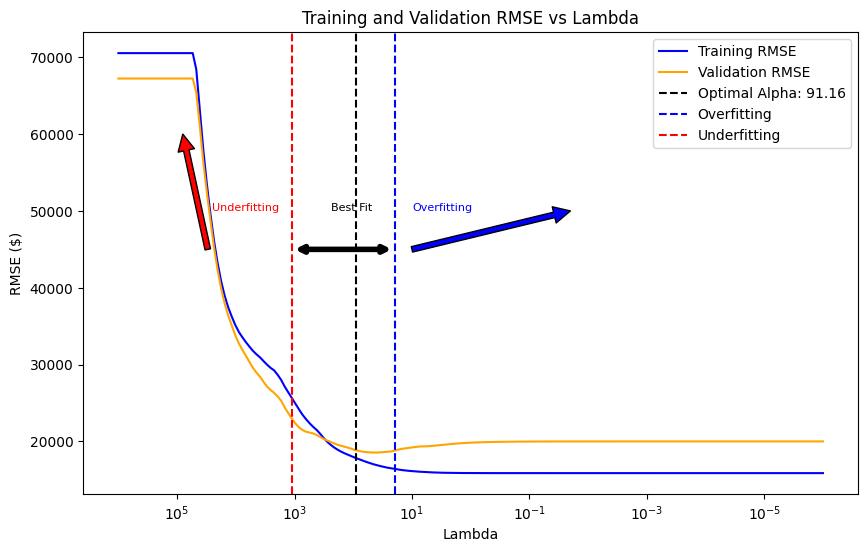

In [101]:
# Indexing border line for underfitting region
under_fitting_lambda = tuned_lasso.alphas_[49]

# Indexing border line for overfitting region
over_fitting_lambda = tuned_lasso.alphas_[78]

# I picked the lambdas that 'act' as the boundaries beyond 
# which the model would now be overfit or underfit and plot on the graphs. 

# Initializing lists to store RMSE values
train_rmse_list = []
valid_rmse_list = []

# Looping over each alpha(lambda) in tuned lasso model
for i, alpha in enumerate(tuned_lasso.alphas_):
    # Fitting lasso model with each alpha
    model = Lasso(alpha=alpha)
    model.fit(lasso_x_train, lasso_y_train)

    # Calculating training RMSE
    y_train_pred = model.predict(lasso_x_train)
    train_rmse = root_mean_squared_error(lasso_y_train, y_train_pred)
    train_rmse_list.append(train_rmse)

    # Calculating validation RMSE
    y_valid_pred = model.predict(x_valid)
    valid_rmse = root_mean_squared_error(y_valid, y_valid_pred)
    valid_rmse_list.append(valid_rmse)


# Finding the optimal alpha (where validation RMSE is minimum)
optimal_alpha = tuned_lasso.alpha_


# Plotting training and validation mses for each alpha
plt.figure(figsize=(10, 6))
plt.plot(tuned_lasso.alphas_, train_rmse_list, label="Training RMSE", color="blue")
plt.plot(tuned_lasso.alphas_, valid_rmse_list, label="Validation RMSE", color="orange")

# Rounding the optimal alpha to 2 decimal places
optimal_alpha_rounded = round(optimal_alpha, 2)

# Creating dashed lines to represent boundaries between underfitting and overfitting
plt.axvline(optimal_alpha, color='black', linestyle='--', label=f'Optimal Alpha: {optimal_alpha_rounded}')
plt.axvline(over_fitting_lambda, color='blue', ls='--', label='Overfitting')
plt.axvline(under_fitting_lambda, color='red', ls='--', label='Underfitting')

# Adding text at desired locations
plt.text(25000, 50000, 'Underfitting', fontsize=8, color='red')
plt.text(240, 50000, 'Best Fit', fontsize=8, color='black')
plt.text(10, 50000, 'Overfitting', fontsize=8, color='blue')

# Placing arrows to show underfitting, best fit and overfitting regions
plt.annotate('', xy=(80000, 60000), xytext=(30000, 45000),
            arrowprops=dict(facecolor='r', shrink=5))
plt.annotate('', xy=(under_fitting_lambda, 45000), xytext=(over_fitting_lambda, 45000),
            arrowprops=dict(facecolor='k', arrowstyle='<->', lw=4))
plt.annotate('', xy=(0.02, 50000), xytext=(10, 45000),
            arrowprops=dict(facecolor='b', shrink=5))



plt.xlabel("Lambda")
plt.ylabel("RMSE ($)")
plt.title("Training and Validation RMSE vs Lambda")
plt.xscale("log")
plt.gca().invert_xaxis()
plt.legend()
plt.show();


The graph above shows underfitting with the blue arrow. As you increase lambda, moving to the left of the red dotted lines, more coefficients are shrink and some are reduced to zero, bringing down the number of variables fitting the model. With fewer variables, you have poor model fit and low predictive power leading to underfitting. 

The opposite can be said for overfitting where with a low lambda, moving to the right of the blue dotted line, has little to no coefficients shrunk or reduced to zero. With more variables in the model, R-squared monotonically increases and reduces the mean-squared error on the training set. However, on the validation set, this would show in the U-shaped as overfitting. 

In this plot, although the RMSE increases after the blue dotted line, it is not very noticeable. This could be that the additional variables that are not shrunk have very low coefficient estimates as they have very little predictive power in explaining 'Sale Price'. That is, weak correlations with 'Sale Price'.

Finally, the 'best-fit' range. I call it that as changing lambdas within that range does not significantly improve the validation mean-squared error. However, for purposes of applying the fitted model to future data sets, the minimum lambda to produce the best coefficients is also shown as the black dotted line.

# Final Model

Using the minimum lambda obtained from the cross-validated lasso regression, I rerun the lasso regression on the entire 'Housing Train' dataset.

In [107]:
lasso = Lasso(alpha=tuned_lasso.alpha_)

final_tuned_lasso = lasso.fit(X_train, Y_train)

c:\Users\ekf98\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+09, tolerance: 4.871e+08
  model = cd_fast.enet_coordinate_descent(


The features I obtained for the final model are below.

In [108]:
# Extracting feature names with non-zero coefficients
selected_features = [X_train.columns[i] for i in range(len(final_tuned_lasso.coef_)) if final_tuned_lasso.coef_[i] != 0]
print(len(selected_features))
print("Selected Features:", selected_features)

107
Selected Features: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'AgeAtSale', 'MSSubClass_20', 'MSSubClass_70', 'MSSubClass_75', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Norm', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'Overal

I then obtained the predictions of Y using the housing test dataset and placed in Mihai's leaderboard.

In [109]:
y_pred = final_tuned_lasso.predict(X_test)
list_predictions = y_pred.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[177091, 115653, 111451, 171201, 119770, 257977, 59304, 179815, 155939, 152366, 133471, 305596, 263828, 175114, 146912, 418326, 118678, 183223, 206278, 63074, 125842, 188578, 156246, 183173, 120522, 114168, 190749, 184224, 173401, 104296, 113913, 144606, 325781, 231096, 169327, 176556, 99677, 134231, 211042, 216787, 154220, 172271, 199646, 126513, 134894, 110367, 120022, 228638, 292535, 160757, 243574, 140730, 130161, 207776, 169906, 176558, 118137, 174563, 141621, 116111, 91753, 135737, 141210, 123948, 204908, 224303, 185333, 217933, 264192, 72828, 202049, 242770, 77564, 229656, 151090, 207007, 115846, 182854, 102659, 149328, 141297, 182953, 242396, 255991, 125579, 228547, 264730, 137094, 268515, 161111, 174978, 187580, 317973, 144398, 154876, 86563, 129740, 210685, 141686, 84934, 202979, 106660, 285295, 153047, 112676, 101511, 197894, 151252, 269789, 370734, 216367, 198410, 45376, 137923, 102576, 123975, 144947, 206733, 258612, 307825, 240626, 204585, 305805, 133936, 106047, 206935, 